In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


#Setting the  parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# Splitting the data into train and Test

In [3]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


# convert class vectors to binary class matrices

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#Intializing the Model

# CNN Model using 3X3 Filters 

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2576 - acc: 0.9205 - val_loss: 0.0586 - val_acc: 0.9822
Epoch 2/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0880 - acc: 0.9743 - val_loss: 0.0425 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0659 - acc: 0.9804 - val_loss: 0.0359 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0538 - acc: 0.9844 - val_loss: 0.0332 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0460 - acc: 0.9858 - val_loss: 0.0277 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0409 - acc: 0.9876 - val_loss: 0.0343 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0374 - acc: 0.9889 - val_loss: 0.0268 - 

In [0]:
y_hat=model.predict(x_test,batch_size=128)
snn_predicted = np.argmax(y_hat, axis=1)



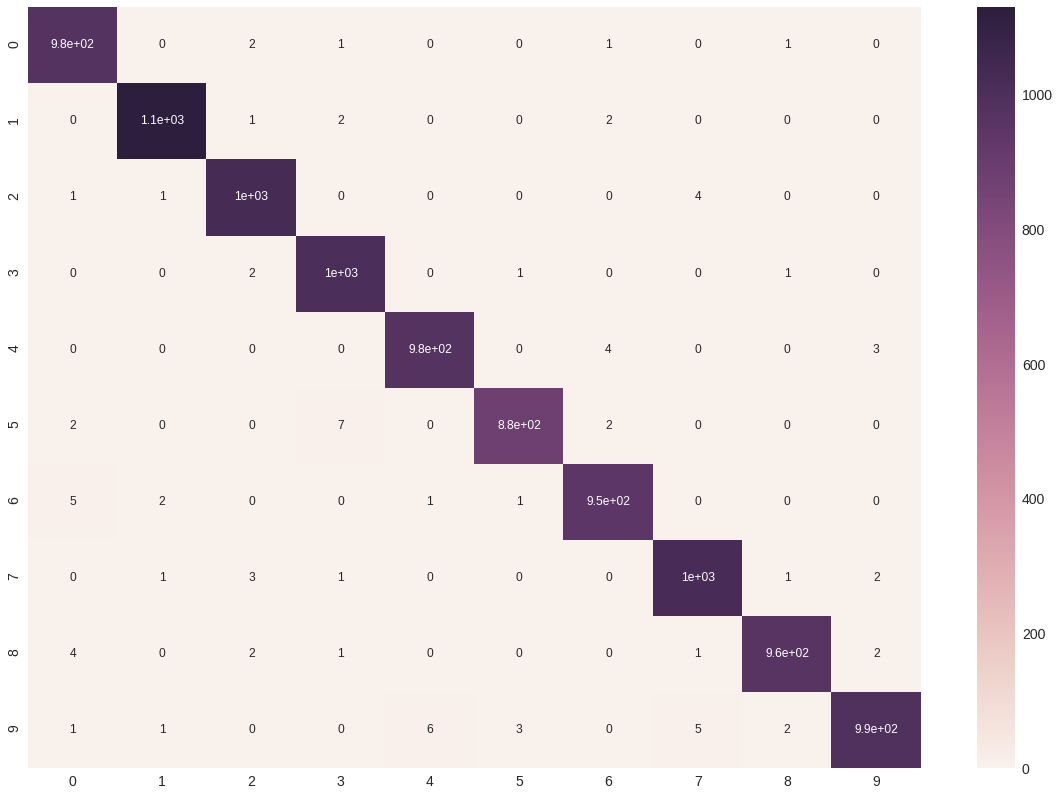

In [25]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [26]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



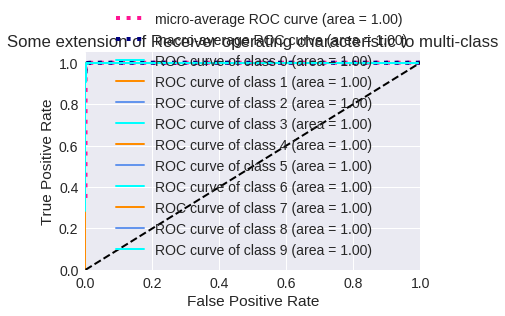

In [32]:
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#Using 5X5 filter with strides=2 

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(2,2),padding='valid',activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 98s 2ms/step - loss: 2.2205 - acc: 0.1718 - val_loss: 1.6818 - val_acc: 0.3989
Epoch 2/12
60000/60000 [==============================] - 97s 2ms/step - loss: 1.9852 - acc: 0.2799 - val_loss: 1.5150 - val_acc: 0.4125
Epoch 3/12
60000/60000 [==============================] - 98s 2ms/step - loss: 1.7582 - acc: 0.3821 - val_loss: 1.4000 - val_acc: 0.5635
Epoch 4/12
60000/60000 [==============================] - 98s 2ms/step - loss: 1.6852 - acc: 0.4068 - val_loss: 1.3592 - val_acc: 0.5831
Epoch 5/12
60000/60000 [==============================] - 98s 2ms/step - loss: 1.6600 - acc: 0.4190 - val_loss: 1.4066 - val_acc: 0.5328
Epoch 6/12
60000/60000 [==============================] - 98s 2ms/step - loss: 1.6382 - acc: 0.4390 - val_loss: 1.3445 - val_acc: 0.6244
Epoch 7/12
60000/60000 [==============================] - 99s 2ms/step - loss: 1.6108 - acc: 0.4545 - val_loss: 1.2959 - val_acc

In [0]:
y_hat=model.predict(x_test,batch_size=128)
snn_predicted = np.argmax(y_hat, axis=1)



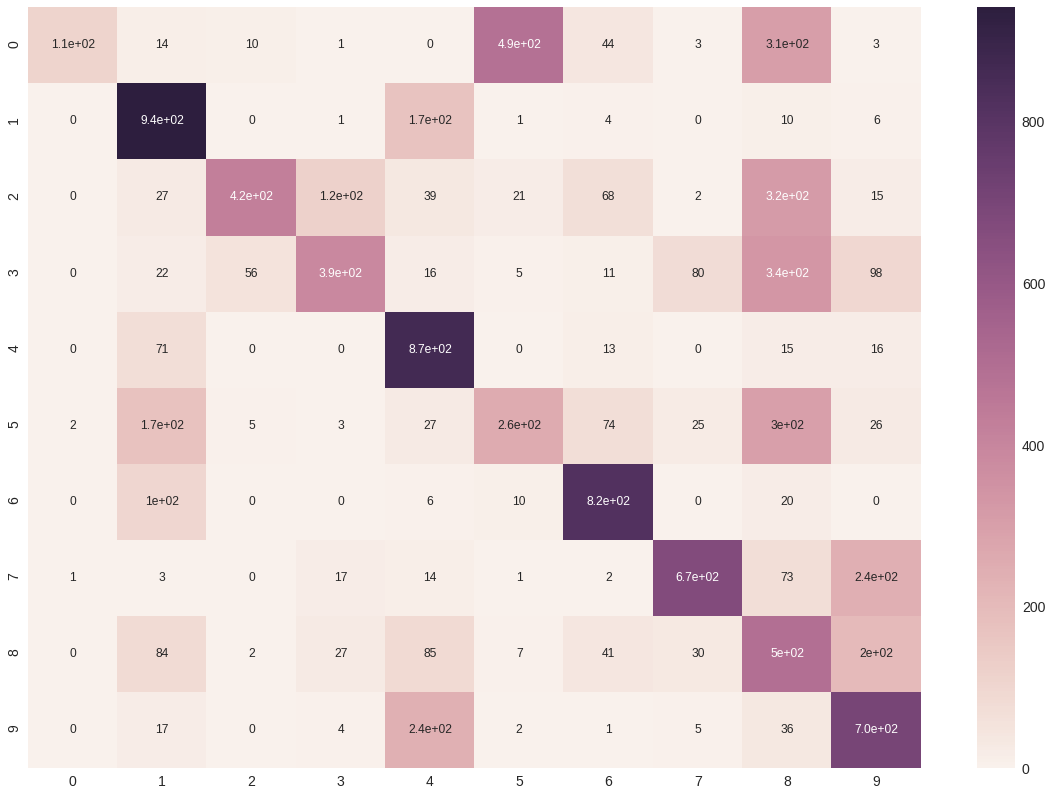

In [10]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [11]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.97      0.11      0.20       980
          1       0.65      0.83      0.73      1135
          2       0.85      0.41      0.56      1032
          3       0.69      0.38      0.49      1010
          4       0.59      0.88      0.71       982
          5       0.32      0.29      0.30       892
          6       0.76      0.85      0.80       958
          7       0.82      0.65      0.73      1028
          8       0.26      0.51      0.34       974
          9       0.54      0.70      0.61      1009

avg / total       0.65      0.57      0.55     10000



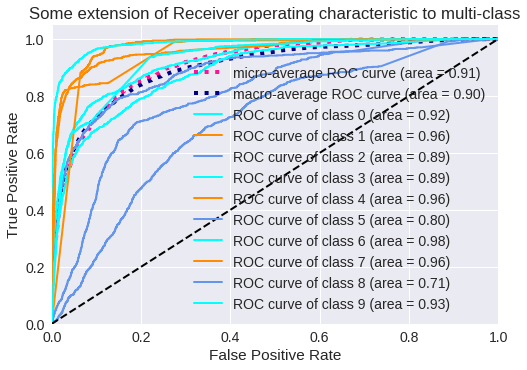

In [12]:
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#Using 7X7 filter with strides=2 and Max Poolsize=3

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(7,7),strides=(2,2),padding='valid',activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (7,7),activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 860us/step - loss: 0.6425 - acc: 0.7985 - val_loss: 0.1860 - val_acc: 0.9413
Epoch 2/12
60000/60000 [==============================] - 53s 875us/step - loss: 0.2964 - acc: 0.9120 - val_loss: 0.1534 - val_acc: 0.9519
Epoch 3/12
60000/60000 [==============================] - 52s 866us/step - loss: 0.2382 - acc: 0.9298 - val_loss: 0.1374 - val_acc: 0.9611
Epoch 4/12
60000/60000 [==============================] - 52s 864us/step - loss: 0.2095 - acc: 0.9381 - val_loss: 0.1023 - val_acc: 0.9700
Epoch 5/12
60000/60000 [==============================] - 52s 868us/step - loss: 0.1910 - acc: 0.9444 - val_loss: 0.1046 - val_acc: 0.9688
Epoch 6/12
60000/60000 [==============================] - 52s 868us/step - loss: 0.1730 - acc: 0.9502 - val_loss: 0.1044 - val_acc: 0.9677
Epoch 7/12
60000/60000 [==============================] - 52s 860us/step - loss: 0.1626 - acc: 0.9532 - val_loss: 0.

In [0]:
y_hat=model.predict(x_test,batch_size=128)
snn_predicted = np.argmax(y_hat, axis=1)



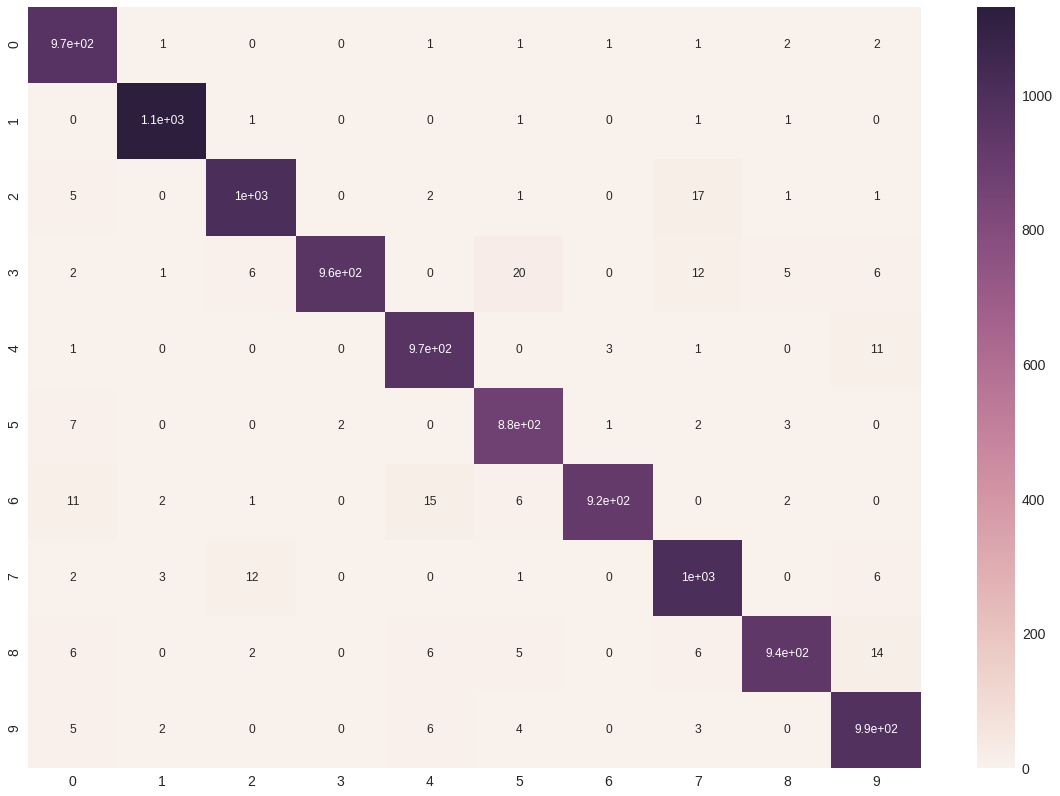

In [10]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [11]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       980
          1       0.99      1.00      0.99      1135
          2       0.98      0.97      0.98      1032
          3       1.00      0.95      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.96      0.98      0.97       892
          6       0.99      0.96      0.98       958
          7       0.96      0.98      0.97      1028
          8       0.99      0.96      0.97       974
          9       0.96      0.98      0.97      1009

avg / total       0.98      0.98      0.98     10000



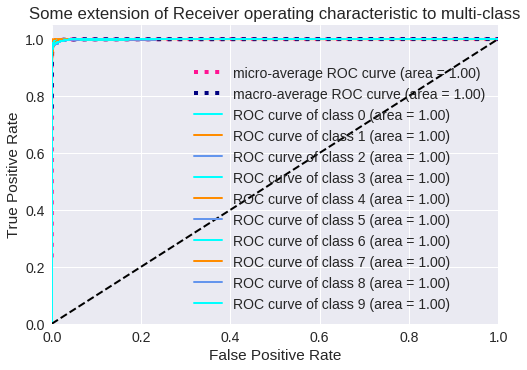

In [12]:
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#Observation

1.We have loaded the Mnist dataset using library

2.I have spiltted the data into train and test

3.I have normalized the training and test dataset

4.I have converted the each output level into a 10dimension vector

5.I have intialized all the model parameters

6.I have built a Model using  CNN-Layer and 3X3 , 5X5,7X7 kernel matrix and dropout and Relu as my activation function. then i have printed the test loss and accuracy of each layer 

.
7.I have also printed the confusion matrix and classification report

In [13]:
data={'CNN_3X3_filter':[ 0.0274,0.9917],'CNN_5X5_filter':[1.344,0.5676],'CNN_7X7_filter':[0.0831,0.9757]}
pd.DataFrame(data,index=['Test-loss','Accuracy'])


,CNN_3X3_filter,CNN_5X5_filter,CNN_7X7_filter
Test-loss,0.0274,1.3440,0.0831
Accuracy,0.9917,0.5676,0.9757
